# Case Study: Evaluating Congestion Control for Satellite Networks

### Scenario:
Your lab is working on a project simulating congestion control protocols on satellite networks. They have run some simulations and produced data stored in Github. They have written some scripts to help with creating plots, but there are some issues they want you to take a look at because they heard you are taking ***Programming With Data*** as part of ***PCT***. Follow the tasks below and help your lab make good decisions.

You don’t need any prior knowledge about satellite networks or congestion control protocols to complete any of the examples.

#### Task
Look through `plot_multi_throughput.py` script and understand what is being done

#### Task
Use `time_scripts.py` to see the example run times when using csv vs parquet

#### Task
Decide which file format you want to use when running `generate_plots.sh`


## Task 1: Download the Data

In [2]:
# download and extract tar file
!wget https://raw.githubusercontent.com/mitdbg/practical-programming-with-data/main/2026/day1_materials/sim_logs.tar.gz
!tar -xzf sim_logs.tar.gz

--2026-01-25 18:55:50--  https://raw.githubusercontent.com/mitdbg/practical-programming-with-data/main/2026/day1_materials/sim_logs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100497460 (96M) [application/octet-stream]
Saving to: ‘sim_logs.tar.gz’

sim_logs.tar.gz     100%[===================>]  95.84M   225MB/s    in 0.4s    

2026-01-25 18:55:51 (225 MB/s) - ‘sim_logs.tar.gz’ saved [100497460/100497460]



In [3]:
# examine the extracted files
!ls sim_logs

LeoGsToGs-1ms-TcpBbr-cwnd.parquet
LeoGsToGs-1ms-TcpBbr-delay.parquet
LeoGsToGs-1ms-TcpBbr-throughput.parquet
LeoGsToGs-1ms-TcpCubic-cwnd.parquet
LeoGsToGs-1ms-TcpCubic-delay.parquet
LeoGsToGs-1ms-TcpCubic-throughput.parquet
LeoGsToGs-1ms-TcpHybla-cwnd.parquet
LeoGsToGs-1ms-TcpHybla-delay.parquet
LeoGsToGs-1ms-TcpHybla-throughput.parquet
LeoGsToGs-1ms-TcpNewReno-cwnd.parquet
LeoGsToGs-1ms-TcpNewReno-delay.parquet
LeoGsToGs-1ms-TcpNewReno-throughput.parquet
LeoHandover-1ms-TcpBbr-cwnd.parquet
LeoHandover-1ms-TcpBbr-delay.parquet
LeoHandover-1ms-TcpBbr-throughput.parquet
LeoHandover-1ms-TcpCubic-cwnd.parquet
LeoHandover-1ms-TcpCubic-delay.parquet
LeoHandover-1ms-TcpCubic-throughput.parquet
LeoHandover-1ms-TcpHybla-cwnd.parquet
LeoHandover-1ms-TcpHybla-delay.parquet
LeoHandover-1ms-TcpHybla-throughput.parquet
LeoHandover-1ms-TcpNewReno-cwnd.parquet
LeoHandover-1ms-TcpNewReno-delay.parquet
LeoHandover-1ms-TcpNewReno-throughput.parquet
LeoSharedPath-1ms-TcpBbr-cwnd.parquet
LeoSharedPath-1ms-

## Task 2:
Somebody suggested to your labmate that they use the `parquet` file format to store the large logs produced by the simulations. Find out why they may have made this suggestion by looking at some differences in the performance of `parquet` vs `csv`.

In [39]:
import pandas as pd

# read parquet file
df = pd.read_parquet("sim_logs/LeoSharedPath-1ms-TcpBbr-throughput.parquet")

# save data as csv
df.to_csv("sim_logs/LeoSharedPath-1ms-TcpBbr-throughput.csv", index=False)

In [40]:
# first, let's look at the difference in the files' raw size(s)
!ls -lth sim_logs/ | grep LeoSharedPath-1ms-TcpBbr-throughput

-rw-r--r-- 1 root root  110M Jan 25 19:20 LeoSharedPath-1ms-TcpBbr-throughput.csv
-rw-r--r-- 1  501 staff 9.8M Jan 25 18:25 LeoSharedPath-1ms-TcpBbr-throughput.parquet


In [43]:
# next, let's time how long it takes for us to read each file from disk
import time

start_time = time.time()
df = pd.read_parquet("sim_logs/LeoSharedPath-1ms-TcpBbr-throughput.parquet")
parquet_read_time = time.time() - start_time

start_time = time.time()
df = pd.read_csv("sim_logs/LeoSharedPath-1ms-TcpBbr-throughput.csv")
csv_read_time = time.time() - start_time

print(f"parquet read time: {parquet_read_time}")
print(f"csv read time: {csv_read_time}")
print("---")
print(f"speedup: {csv_read_time / parquet_read_time:.2f}x")

parquet read time: 0.29607415199279785
csv read time: 0.9260931015014648
---
speedup: 3.13x


In [44]:
# now let's examine the first few rows of the dataframe
df.head()

,time(s),flowId,bytes
0,1.02105,Flow1,54
1,1.02120,Flow1,590
2,1.02130,Flow1,590
3,1.02139,Flow1,590
4,1.02149,Flow1,590


In [45]:
# parquet enables you to only read / load certain columns from the raw data;
# as a final experiment, let's see how long it takes us to load the flowId and bytes
# columns with parquet, relative to loading the entire CSV and post-filtering it
# next, let's time how long it takes for us to read each file from disk
import time

start_time = time.time()
df = pd.read_parquet("sim_logs/LeoSharedPath-1ms-TcpBbr-throughput.parquet", columns=["flowId", "bytes"])
parquet_read_time = time.time() - start_time

start_time = time.time()
df = pd.read_csv("sim_logs/LeoSharedPath-1ms-TcpBbr-throughput.csv")
df = df.loc[:, ["flowId", "bytes"]]
csv_read_time = time.time() - start_time

print(f"parquet read time: {parquet_read_time}")
print(f"csv read time: {csv_read_time}")
print("---")
print(f"speedup: {csv_read_time / parquet_read_time:.2f}")

parquet read time: 0.20278382301330566
csv read time: 1.040252923965454
---
speedup: 5.13


## Task 3:
Let's examine the queueing delay associated with the BBR algorithm (`TcpBbr`) in the `GsToGs` setting.

In [31]:
delay_df = pd.read_parquet("sim_logs/LeoGsToGs-1ms-TcpBbr-delay.parquet")

In [32]:
delay_df.head()

,time(s),flowId,queue_dealy(us)
0,1.03108,Flow1,0
1,1.03127,Flow1,0
2,1.03140,Flow1,0
3,1.03153,Flow1,0
4,1.03165,Flow1,0


In [33]:
# Q: How many unique flows are in this data sample?
delay_df['flowId'].nunique()

1

In [34]:
# Data Cleaning: There's a typo in the column name "queue_dealy(us)" rename this column to "queue_delay(us)"
delay_df.rename(columns={'queue_dealy(us)': 'queue_delay(us)'}, inplace=True)

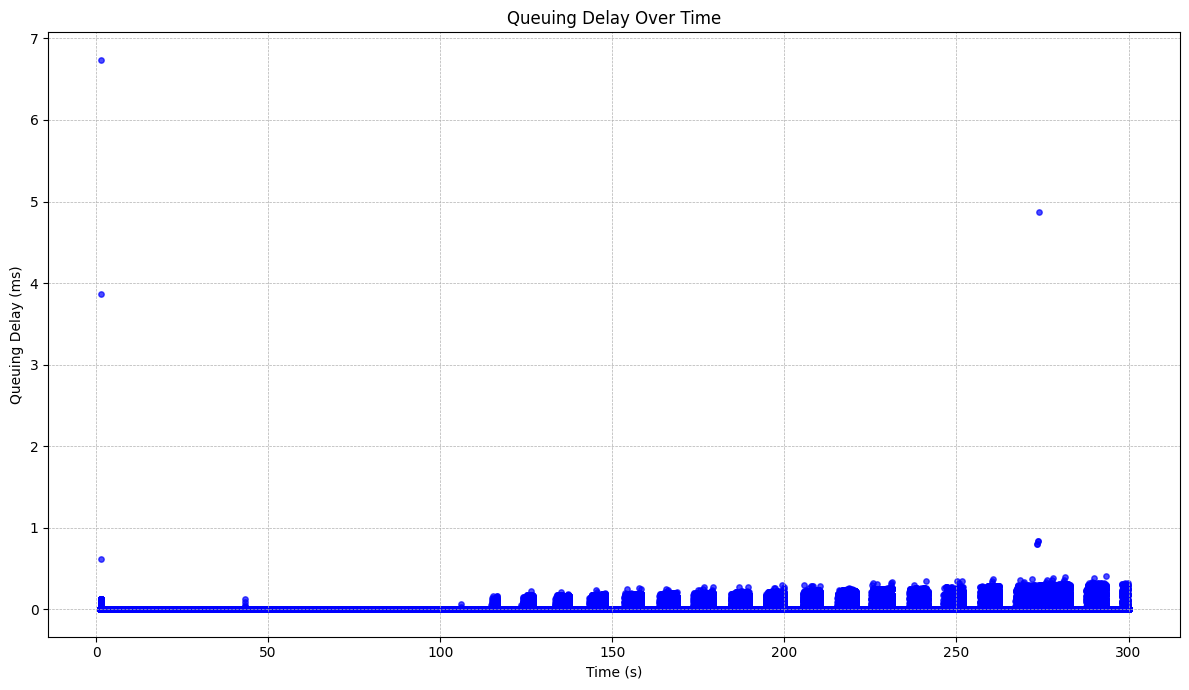

In [35]:
# Plotting: plot the queueing delay in **milliseconds** vs. time in seconds
import matplotlib.pyplot as plt

delay_df['delay(ms)'] = delay_df['queue_delay(us)'] / 1000.0

plt.figure(figsize=(12, 7))
plt.scatter(delay_df['time(s)'], delay_df['delay(ms)'], s=15, alpha=0.7, color='b')

plt.title('Queuing Delay Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Queuing Delay (ms)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

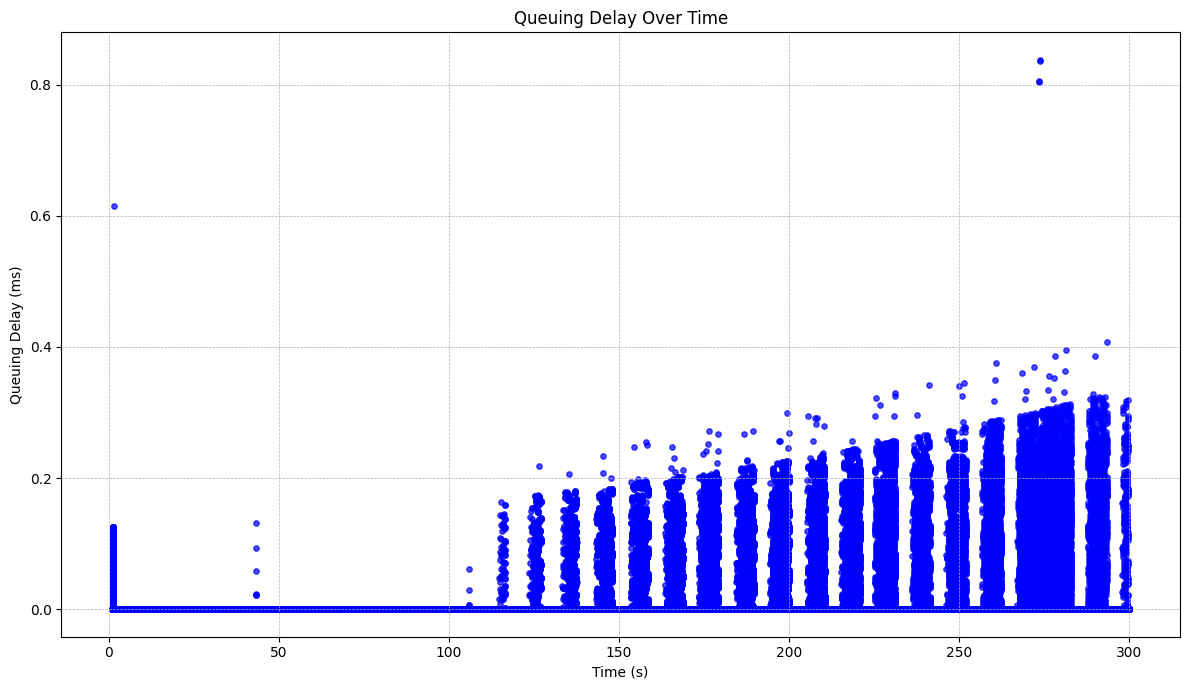

In [36]:
# Plotting: to better examine the queueing delay behavior, generate another
# version of the plot which does not contain samples with >1.0 ms of delay
import matplotlib.pyplot as plt

delay_df['delay(ms)'] = delay_df['queue_delay(us)'] / 1000.0
delay_df = delay_df[delay_df['delay(ms)'] < 1.0]

plt.figure(figsize=(12, 7))
plt.scatter(delay_df['time(s)'], delay_df['delay(ms)'], s=15, alpha=0.7, color='b')

plt.title('Queuing Delay Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Queuing Delay (ms)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

## Task 4:

Let's now examine the congestion window of various congestion control algorithms for the `GsToGs` setting.

In [2]:
# Task: load the congestion window (cwnd) data for `TcpBbr`, `TcpCubic`, `TcpNewReno`, and `TcpHybla` in the `GsToGs` setting
import pandas as pd

bbr_df = pd.read_parquet("sim_logs/LeoGsToGs-1ms-TcpBbr-cwnd.parquet")
cubic_df = pd.read_parquet("sim_logs/LeoGsToGs-1ms-TcpCubic-cwnd.parquet")
reno_df = pd.read_parquet("sim_logs/LeoGsToGs-1ms-TcpNewReno-cwnd.parquet")
hybla_df = pd.read_parquet("sim_logs/LeoGsToGs-1ms-TcpHybla-cwnd.parquet")

In [3]:
# let's examine the head of each dataframe to ensure their schemas match
print(bbr_df.head())
print("---")
print(cubic_df.head())
print("---")
print(reno_df.head())
print("---")
print(hybla_df.head())

   time(s) flowId   cwnd
0  1.04844  Flow1   5896
1  1.04871  Flow1   6968
2  1.04899  Flow1   8040
3  1.04926  Flow1   9112
4  1.04954  Flow1  10184
---
   time(s) flowId   cwnd
0  1.04844  Flow1   5896
1  1.04871  Flow1   6968
2  1.04899  Flow1   8040
3  1.04926  Flow1   9112
4  1.04954  Flow1  10184
---
   time(s) flowId  cwnd
0  1.04844  Flow1  5896
1  1.04871  Flow1  6432
2  1.04899  Flow1  6968
3  1.04926  Flow1  7504
4  1.04954  Flow1  8040
---
   time(s) flowId  cwnd
0  1.04844  Flow1  5896
1  1.04871  Flow1  6432
2  1.04899  Flow1  6968
3  1.04926  Flow1  7504
4  1.04954  Flow1  8040


In [4]:
# Task: coalesce all the data into a single dataframe, adding a new column 'cc_algo',
# which stores the name of the congestion control algorithm associated with that data;
bbr_df['cc_algo'] = 'TcpBbr'
cubic_df['cc_algo'] = 'TcpCubic'
reno_df['cc_algo'] = 'TcpNewReno'
hybla_df['cc_algo'] = 'TcpHybla'

df = pd.concat([bbr_df, cubic_df, reno_df, hybla_df])

In [5]:
# Task: Remove outliers by filtering for congestion windows < 3e5
df = df.loc[df['cwnd'] < 3e5, :]

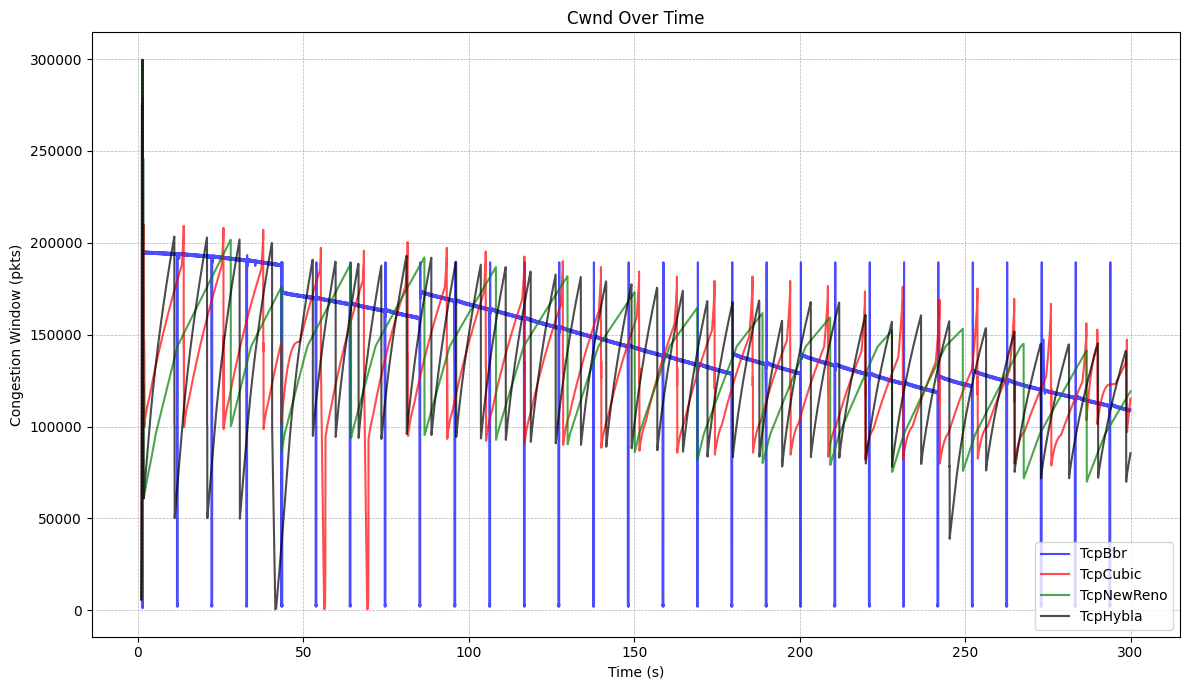

In [6]:
# Plotting: plot the congestion window as a function of time for each algorithm;
# plot each algorithm as a separate line on the same plot w/colors and a legend to distinguish them
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

colors = ['b', 'r', 'g', 'k']
for idx, algo in enumerate(df['cc_algo'].unique()):
  algo_df = df.loc[df.cc_algo == algo, :]
  plt.plot(algo_df['time(s)'], algo_df['cwnd'], label=algo, alpha=0.7, color=colors[idx])

plt.title('Cwnd Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Congestion Window (pkts)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc="lower right")
plt.tight_layout()

plt.show()

In [7]:
# Task: bucket the data into 10s time intervals, write a function which computes time(s) // 10
# and apply that function to the time(s) column, saving the output in a new "interval" column
def bucket(time):
  return time // 10

df.loc[:, 'interval'] = df['time(s)'].apply(lambda t: bucket(t))

In [8]:
# Task: compute and print the average congestion window for each unique (cc_algo, interval) (Hint: use .groupby())
for (algo, interval), algo_df in df.groupby(['cc_algo', 'interval']):
  print(f"({algo}, {interval}) -> {algo_df['cwnd'].mean():.1f}")

(TcpBbr, 0.0) -> 138596.3
(TcpBbr, 1.0) -> 80607.5
(TcpBbr, 2.0) -> 84886.4
(TcpBbr, 3.0) -> 84363.6
(TcpBbr, 4.0) -> 66775.6
(TcpBbr, 5.0) -> 72658.3
(TcpBbr, 6.0) -> 75822.8
(TcpBbr, 7.0) -> 73435.8
(TcpBbr, 8.0) -> 72571.8
(TcpBbr, 9.0) -> 71442.7
(TcpBbr, 10.0) -> 68827.1
(TcpBbr, 11.0) -> 64477.1
(TcpBbr, 12.0) -> 64998.8
(TcpBbr, 13.0) -> 62501.7
(TcpBbr, 14.0) -> 56385.9
(TcpBbr, 15.0) -> 57842.3
(TcpBbr, 16.0) -> 55173.6
(TcpBbr, 17.0) -> 54713.1
(TcpBbr, 18.0) -> 49497.2
(TcpBbr, 19.0) -> 132083.4
(TcpBbr, 20.0) -> 52880.9
(TcpBbr, 21.0) -> 50709.0
(TcpBbr, 22.0) -> 47802.5
(TcpBbr, 23.0) -> 44825.1
(TcpBbr, 24.0) -> 49431.4
(TcpBbr, 25.0) -> 45341.1
(TcpBbr, 26.0) -> 45801.6
(TcpBbr, 27.0) -> 48464.9
(TcpBbr, 28.0) -> 44767.9
(TcpBbr, 29.0) -> 39972.0
(TcpCubic, 0.0) -> 170788.8
(TcpCubic, 1.0) -> 155115.7
(TcpCubic, 2.0) -> 154942.8
(TcpCubic, 3.0) -> 155744.3
(TcpCubic, 4.0) -> 128233.7
(TcpCubic, 5.0) -> 131552.8
(TcpCubic, 6.0) -> 134389.8
(TcpCubic, 7.0) -> 134000.0
(Tcp

In [13]:
# Task: in how many intervals does TcpCubic have the largest mean congestion window?
#
# Hint:
# - Initialize two empty lists, one to contain data for TcpCubic and another to contain data for the other algorithms
# - Use the same groupby from before to compute the mean congestion window for each algorithm in each interval
# - Put each interval and congestion window into a dictionary:
#   - for cubic data: {"interval": interval, "mean_cwnd_cubic": group_df['cwnd'].mean()}
#   - for the rest: {"interval": interval, "mean_cwnd": group_df['cwnd'].mean()}
#   - append the dictionary to its respective list (cubic data --> cubic list, other data --> other list)
# - Construct a dataframe from each list
# - Join the dataframes on the "interval" column (use .merge()) and store the output in a final dataframe
# - Group the final by interval, and compute the fraction of intervals with mean_cwnd_cubic > mean_cwnd for all rows
cubic_data, other_data = [], []
for (algo, interval), algo_df in df.groupby(['cc_algo', 'interval']):
  if algo == 'TcpCubic':
    cubic_data.append({"interval": interval, "mean_cwnd_cubic": algo_df['cwnd'].mean()})
  else:
    other_data.append({"interval": interval, "mean_cwnd": algo_df['cwnd'].mean()})

cubic_df = pd.DataFrame(cubic_data)
other_df = pd.DataFrame(other_data)

merged_df = cubic_df.merge(other_df, on='interval')

cubic_wins = 0
for interval, interval_df in merged_df.groupby("interval"):
  interval_df['cubic_wins'] = interval_df['mean_cwnd_cubic'] > interval_df['mean_cwnd']
  if interval_df['cubic_wins'].all():
    cubic_wins += 1

print(f"Cubic wins {cubic_wins} intervals")


Cubic wins 16 intervals
